In [1]:
import re
import string
from shapely.geometry import Point, MultiPolygon, Polygon
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from datetime import datetime
import pip
pip.main(['install','seaborn'])
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from seaborn) (1.26.4)

Requirement already satisfied: pandas>=1.2 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from seaborn) (2.2.1)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from seaborn) (3.8.3)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.0)

Requirement already satisfied: cycler>=0.10 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.49.0)

Requirement already satisfied: kiwisolver>=1.3.1 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.5)

Requirement already satisfied: packaging>=20.0 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (23.2)

Requirement already satisfied: pillow>=8 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.2.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.2)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.9.0)

Requirement already satisfied: pytz>=2020.1 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: tzdata>=2022.7 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: six>=1.5 in c:\users\sarah\anaconda3\envs\geospatial\lib\site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.16.0)

In [2]:
zipcodes = gpd.read_file('../trash-haulers-otto/zipcodes.geojson')

In [3]:
zipcodes = zipcodes.rename(columns = {'zip':'Zip Code'})

In [4]:
zipcodes['Zip Code'] = zipcodes['Zip Code'].astype(int)

In [5]:
trash = pd.read_csv('../trash-haulers-otto/trash_hauler_report.csv')

In [6]:
ee_miss = trash.loc[~trash['Request '].isin(['Trash - Curbside/Alley Missed Pickup'])]
ee_miss

Request Number Date Opened                    Request   \
0               25270    11/01/17            Trash - Backdoor   
5               25317    11/01/17  Trash Collection Complaint   
6               25325    11/01/17          Damage to Property   
7               25327    11/01/17  Trash Collection Complaint   
11              25350    11/01/17  Trash Collection Complaint   
...               ...         ...                         ...   
20202          266912    11/01/19            Trash - Backdoor   
20205          266944    11/01/19            Trash - Backdoor   
20211          267014    11/01/19  Trash Collection Complaint   
20215          267069    11/01/19  Trash Collection Complaint   
20218          267110    11/01/19            Trash - Backdoor   

                                             Description  \
0      house with the wheel chair ramp, they share dr...   
5      left trash cart in middle of driveway instead ...   
6      Trash/emptied Wednesday & now metal black-mail...   
7           Trash out on time, miss again Tuesday. ALLEY   
11                            Missed- 4th week in a row.   
...                                                  ...   
20202              missed multiple times, please pick up   
20205                      backdoor miss/ again Thursday   
20211  MANAGER SAYS HE WITNESSED THE TRASH TRUCK COME...   
20215  trash truck broke a limb out of her tree and l...   
20218                         Friday/paid backdoor trash   

                                        Incident Address  Zip Code  \
0                                         3817 Crouch Dr   37207.0   
5                                         3602 floral dr   37211.0   
6                                       4721 Chalmers Dr   37215.0   
7                                   1816 Jo Johnston Ave   37203.0   
11                                3210 Whites Creek Pike   37207.0   
...                                                  ...       ...   
20202  3110 Lebanon Rd, Lebanon, TN 37087, United States   37214.0   
20205  812 Horner Ave, Nashville, TN 37204, United St...   37204.0   
20211  109 2nd Ave N, Nashville, TN 37201, United States   37201.0   
20215      105 Lake Side Ct, Nashville, Tennessee, 37217   37217.0   
20218                                     3105 fisher dr   37214.0   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
0        RED RIVER        3205               2.0  1.727970e+06  686779.478089  
5        RED RIVER        4304              16.0  1.751660e+06  643215.201073  
6        RED RIVER        3303              34.0  1.726301e+06  637078.402245  
7            METRO        9208              21.0  1.731459e+06  666013.601229  
11       RED RIVER        3201               3.0  1.726433e+06  691919.200296  
...            ...         ...               ...           ...            ...  
20202    RED RIVER        1505              14.0  1.778640e+06  673206.400243  
20205        METRO        9404              17.0  1.738949e+06  652136.908253  
20211          NaN         NaN              19.0  1.739543e+06  666600.801041  
20215    RED RIVER        3501              29.0  1.789265e+06  640868.001440  
20218    RED RIVER        1503              15.0  1.767923e+06  673264.801310  

[5198 rows x 11 columns]

In [10]:
trash['Request '].value_counts()

Request 
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [11]:
request = trash.loc[trash ['Request '] == "Trash - Curbside/Alley Missed Pickup" ]
request

Request Number Date Opened                              Request   \
1               25274    11/01/17  Trash - Curbside/Alley Missed Pickup   
2               25276    11/01/17  Trash - Curbside/Alley Missed Pickup   
3               25307    11/01/17  Trash - Curbside/Alley Missed Pickup   
4               25312    11/01/17  Trash - Curbside/Alley Missed Pickup   
8               25330    11/01/17  Trash - Curbside/Alley Missed Pickup   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                             Description  \
1                               Curb/Trash miss Tuesday.   
2                               Curb/trash miss Tuesday.   
3                                                 missed   
4                      Missed the even side of the road.   
8                                                Missed.   
...                                                  ...   
20221                          MISSED...NEIGHBORS MISSED   
20222                                       entire alley   
20223                                     missed several   
20224  Caller stated trash was missed & were only pic...   
20225                     possibly others missed as well   

                                        Incident Address  Zip Code  \
1                                  4028 Clarksville Pike   37218.0   
2                                    6528 Thunderbird Dr   37209.0   
3                                   2603 old matthews rd   37207.0   
4                                          604 croley dr   37209.0   
8                          4484 Lavergne Couchville Pike   37013.0   
...                                                  ...       ...   
20221                             2731 Murfreesboro Pike   37013.0   
20222  1621 Long Ave, Nashville, TN 37206, United States   37206.0   
20223  2943 Windemere Cir, Nashville, TN 37214, Unite...   37214.0   
20224  3325 Murfreesboro Pike, Nashville, TN 37013, U...   37013.0   
20225  604 Somerset Ct, Nashville, TN 37217, United S...   37217.0   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
1        RED RIVER        4202               1.0  1.721259e+06  685444.799565  
2        RED RIVER        4205              20.0  1.707027e+06  659887.471571  
3        WASTE IND        2206               2.0  1.735692e+06  685027.245923  
4        RED RIVER        4203              20.0  1.710186e+06  664205.101066  
8        RED RIVER        4210              33.0  1.794534e+06  618749.342732  
...            ...         ...               ...           ...            ...  
20221    RED RIVER        4502              32.0  1.781137e+06  632448.551144  
20222        METRO        9508               6.0  1.749711e+06  669201.601569  
20223    RED RIVER        1502              15.0  1.770293e+06  674936.303809  
20224    RED RIVER        4502              32.0  1.785225e+06  627146.400187  
20225    RED RIVER        2505              29.0  1.781360e+06  637742.006846  

[15028 rows x 11 columns]

In [12]:
pd.set_option("max_colwidth", None)
ee_miss

Request Number Date Opened                    Request   \
0               25270    11/01/17            Trash - Backdoor   
5               25317    11/01/17  Trash Collection Complaint   
6               25325    11/01/17          Damage to Property   
7               25327    11/01/17  Trash Collection Complaint   
11              25350    11/01/17  Trash Collection Complaint   
...               ...         ...                         ...   
20202          266912    11/01/19            Trash - Backdoor   
20205          266944    11/01/19            Trash - Backdoor   
20211          267014    11/01/19  Trash Collection Complaint   
20215          267069    11/01/19  Trash Collection Complaint   
20218          267110    11/01/19            Trash - Backdoor   

                                                                                                                                                                                                                                                                                                                           Description  \
0                                                                                                                                                                                                      house with the wheel chair ramp, they share driveway, in back driveway. 3817 Crouch Dr near NES light post is. \r\n615-876-6274   
5                                                                                                                                                                                                                                                         left trash cart in middle of driveway instead of at the backdoor pickup spot   
6                                                                                                                                                                                                                          Trash/emptied Wednesday & now metal black-mailbox damage. \r\ncustomer wants call back and fix and replace.   
7                                                                                                                                                                                                                                                                                         Trash out on time, miss again Tuesday. ALLEY   
11                                                                                                                                                                                                                                                                                                          Missed- 4th week in a row.   
...                                                                                                                                                                                                                                                                                                                                ...   
20202                                                                                                                                                                                                                                                                                            missed multiple times, please pick up   
20205                                                                                                                                                                                                                                                                                                    backdoor miss/ again Thursday   
20211  MANAGER SAYS HE WITNESSED THE TRASH TRUCK COME BY, KNOCK OVER A CART THEN BACK UP PUSHING THE CART BACK, THEN HE PULLED FORWARD THEN BACK UP AGAIN UNTIL HE RAN OVER THE CART. HE THEN EXITED THE TRUCK, PICKED THE CART UP AND THREW IT INTO THE TRUCK, 

In [13]:
ee_miss.loc[ee_miss['Description'].str.contains(r'\bmiss\B',na = False)]

Request Number Date Opened                    Request   \
27              25508    11/01/17  Trash Collection Complaint   
35              25525    11/01/17  Trash Collection Complaint   
44              25578    11/02/17  Trash Collection Complaint   
64              25780    11/02/17  Trash Collection Complaint   
65              25784    11/02/17  Trash Collection Complaint   
...               ...         ...                         ...   
20169          266628    10/31/19  Trash Collection Complaint   
20178          266708    11/01/19  Trash Collection Complaint   
20179          266710    11/01/19  Trash Collection Complaint   
20183          266732    11/01/19  Trash Collection Complaint   
20202          266912    11/01/19            Trash - Backdoor   

                                                                                                                                                                                               Description  \
27     missed. Neighbor missed as well-say she is at a dead end and she is constantly missed. She understands it is hard for the driver to turn around  but she doesn't want to have to call all the time.   
35                                                                                                                             Missed my trash AGAIN.\r\ncheck your records.  I get missed all of the time   
44                                                           Curb/Trash missed Whole street, check for other streets as well seen carts still out.  Wednesday. Has to keep calling. \r\nwants to know why?   
64                                                                                                    Missed again\r\npicked up everyone except her\r\ndoes not understand why keep missing (615) 753-1696   
65                                                                                                                                                                       Customer says it was missed again   
...                                                                                                                                                                                                    ...   
20169                                                                                                           Disabled caller stated she is keep getting missed.\r\nCaller stated she is getting fed up.   
20178                                                                                                                                             Caller stated her trash has been missed for 2 1/2 weeks.   
20179                                                                                                       Trash/has been missed for weeks in a row, curb {Friday} cart has been out on street for month.   
20183                                                                                  Caller stated her trash misses her trash all the time. Driver still did not pick trash, after a request was put in.   
20202                                                                                                                                                                missed multiple times, please pick up   

                                                 Incident Address  Zip Code  \
27                                                2812 27TH AVE S   37212.0   
35                                               162 antioch pike   37211.0   
44                                             204 Channelkirk Ln   37215.0   
64                                                  816 Elissa Dr   37217.0   
65                                               608 CLEVELAND ST   37207.0   
...                                                           ...       ...   
20169        1719 Windover Dr, Nashville, TN 37218, United States   37218.0   
20178  4305 Granny White Pike, Nashville, TN 37204, United States   37204.0   
20179  3325 Murfreesboro Pike, Nashville, 

In [14]:
total_misses = pd.concat([ee_miss, request])
total_misses

Request Number Date Opened                              Request   \
0               25270    11/01/17                      Trash - Backdoor   
5               25317    11/01/17            Trash Collection Complaint   
6               25325    11/01/17                    Damage to Property   
7               25327    11/01/17            Trash Collection Complaint   
11              25350    11/01/17            Trash Collection Complaint   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                                                                                                           Description  \
0      house with the wheel chair ramp, they share driveway, in back driveway. 3817 Crouch Dr near NES light post is. \r\n615-876-6274   
5                                                         left trash cart in middle of driveway instead of at the backdoor pickup spot   
6                          Trash/emptied Wednesday & now metal black-mailbox damage. \r\ncustomer wants call back and fix and replace.   
7                                                                                         Trash out on time, miss again Tuesday. ALLEY   
11                                                                                                          Missed- 4th week in a row.   
...                                                                                                                                ...   
20221                                                                                                        MISSED...NEIGHBORS MISSED   
20222                                                                                                                     entire alley   
20223                                                                                                                   missed several   
20224                                                     Caller stated trash was missed & were only picked up 3x in the last 3 month.   
20225                                                                                                   possibly others missed as well   

                                                 Incident Address  Zip Code  \
0                                                  3817 Crouch Dr   37207.0   
5                                                  3602 floral dr   37211.0   
6                                                4721 Chalmers Dr   37215.0   
7                                            1816 Jo Johnston Ave   37203.0   
11                                         3210 Whites Creek Pike   37207.0   
...                                                           ...       ...   
20221                                      2731 Murfreesboro Pike   37013.0   
20222           1621 Long Ave, Nashville, TN 37206, United States   37206.0   
20223      2943 Windemere Cir, Nashville, TN 37214, United States   37214.0   
20224  3325 Murfreesboro Pike, Nashville, TN 37013, United States   37013.0   
20225         604 Somerset Ct, Nashville, TN 37217, United States   37217.0   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
0        RED RIVER        3205               2.0  1.727970e+06  686779.478089  
5        RED RIVER        4304              16.0  1.751660e+06  643215.201073  
6        RED RIVER        3303              34.0  1.726301e+06  637078.402245  
7            METRO        9208              21.0  1.731459e+06  666013.601229  
11       RED RIVER        3201               3.0  1.726433e+06  691919.200296  
...            ...  

In [15]:
total_misses['Description'] = total_misses['Description'].str.upper()

In [16]:
total_misses['Description']

0        HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DRIVEWAY, IN BACK DRIVEWAY. 3817 CROUCH DR NEAR NES LIGHT POST IS. \r\n615-876-6274
5                                                           LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD OF AT THE BACKDOOR PICKUP SPOT
6                            TRASH/EMPTIED WEDNESDAY & NOW METAL BLACK-MAILBOX DAMAGE. \r\nCUSTOMER WANTS CALL BACK AND FIX AND REPLACE.
7                                                                                           TRASH OUT ON TIME, MISS AGAIN TUESDAY. ALLEY
11                                                                                                            MISSED- 4TH WEEK IN A ROW.
                                                                      ...                                                               
20221                                                                                                          MISSED...NEIGHBORS MISSED
20222                                    

In [17]:
total_misses['Zip Code'] = total_misses['Zip Code'].fillna(0)
total_misses['Zip Code'] = total_misses['Zip Code'].astype(int)

In [18]:
total_misses['Council District'] = total_misses['Council District'].fillna(0)
total_misses['Council District'] = total_misses['Council District'].astype(int)

In [19]:
total_misses

Request Number Date Opened                              Request   \
0               25270    11/01/17                      Trash - Backdoor   
5               25317    11/01/17            Trash Collection Complaint   
6               25325    11/01/17                    Damage to Property   
7               25327    11/01/17            Trash Collection Complaint   
11              25350    11/01/17            Trash Collection Complaint   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                                                                                                           Description  \
0      HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DRIVEWAY, IN BACK DRIVEWAY. 3817 CROUCH DR NEAR NES LIGHT POST IS. \r\n615-876-6274   
5                                                         LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD OF AT THE BACKDOOR PICKUP SPOT   
6                          TRASH/EMPTIED WEDNESDAY & NOW METAL BLACK-MAILBOX DAMAGE. \r\nCUSTOMER WANTS CALL BACK AND FIX AND REPLACE.   
7                                                                                         TRASH OUT ON TIME, MISS AGAIN TUESDAY. ALLEY   
11                                                                                                          MISSED- 4TH WEEK IN A ROW.   
...                                                                                                                                ...   
20221                                                                                                        MISSED...NEIGHBORS MISSED   
20222                                                                                                                     ENTIRE ALLEY   
20223                                                                                                                   MISSED SEVERAL   
20224                                                     CALLER STATED TRASH WAS MISSED & WERE ONLY PICKED UP 3X IN THE LAST 3 MONTH.   
20225                                                                                                   POSSIBLY OTHERS MISSED AS WELL   

                                                 Incident Address  Zip Code  \
0                                                  3817 Crouch Dr     37207   
5                                                  3602 floral dr     37211   
6                                                4721 Chalmers Dr     37215   
7                                            1816 Jo Johnston Ave     37203   
11                                         3210 Whites Creek Pike     37207   
...                                                           ...       ...   
20221                                      2731 Murfreesboro Pike     37013   
20222           1621 Long Ave, Nashville, TN 37206, United States     37206   
20223      2943 Windemere Cir, Nashville, TN 37214, United States     37214   
20224  3325 Murfreesboro Pike, Nashville, TN 37013, United States     37013   
20225         604 Somerset Ct, Nashville, TN 37217, United States     37217   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
0        RED RIVER        3205                 2  1.727970e+06  686779.478089  
5        RED RIVER        4304                16  1.751660e+06  643215.201073  
6        RED RIVER        3303                34  1.726301e+06  637078.402245  
7            METRO        9208                21  1.731459e+06  666013.601229  
11       RED RIVER        3201                 3  1.726433e+06  691919.200296  
...            ...  

In [20]:
total_misses['Zip Code'].value_counts()

Zip Code
37013    2278
37211    2248
37205    1491
37209    1411
37215    1404
37207    1300
37115    1266
37206    1217
37208    1039
37214    1004
37218     983
37216     841
37217     832
37204     635
37212     601
37210     550
37203     394
37220     289
37027     168
0          75
37189      60
37221      48
37219      42
37201      35
37138       5
37076       5
37086       3
37213       1
37228       1
Name: count, dtype: int64

In [21]:
total_misses['Incident Address'] = total_misses['Incident Address'].str.strip()

In [22]:
total_misses['Incident Address'] = total_misses['Incident Address'].str.lower()
total_misses['Incident Address'] = total_misses['Incident Address'].str.title()
total_misses

Request Number Date Opened                              Request   \
0               25270    11/01/17                      Trash - Backdoor   
5               25317    11/01/17            Trash Collection Complaint   
6               25325    11/01/17                    Damage to Property   
7               25327    11/01/17            Trash Collection Complaint   
11              25350    11/01/17            Trash Collection Complaint   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                                                                                                           Description  \
0      HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DRIVEWAY, IN BACK DRIVEWAY. 3817 CROUCH DR NEAR NES LIGHT POST IS. \r\n615-876-6274   
5                                                         LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD OF AT THE BACKDOOR PICKUP SPOT   
6                          TRASH/EMPTIED WEDNESDAY & NOW METAL BLACK-MAILBOX DAMAGE. \r\nCUSTOMER WANTS CALL BACK AND FIX AND REPLACE.   
7                                                                                         TRASH OUT ON TIME, MISS AGAIN TUESDAY. ALLEY   
11                                                                                                          MISSED- 4TH WEEK IN A ROW.   
...                                                                                                                                ...   
20221                                                                                                        MISSED...NEIGHBORS MISSED   
20222                                                                                                                     ENTIRE ALLEY   
20223                                                                                                                   MISSED SEVERAL   
20224                                                     CALLER STATED TRASH WAS MISSED & WERE ONLY PICKED UP 3X IN THE LAST 3 MONTH.   
20225                                                                                                   POSSIBLY OTHERS MISSED AS WELL   

                                                 Incident Address  Zip Code  \
0                                                  3817 Crouch Dr     37207   
5                                                  3602 Floral Dr     37211   
6                                                4721 Chalmers Dr     37215   
7                                            1816 Jo Johnston Ave     37203   
11                                         3210 Whites Creek Pike     37207   
...                                                           ...       ...   
20221                                      2731 Murfreesboro Pike     37013   
20222           1621 Long Ave, Nashville, Tn 37206, United States     37206   
20223      2943 Windemere Cir, Nashville, Tn 37214, United States     37214   
20224  3325 Murfreesboro Pike, Nashville, Tn 37013, United States     37013   
20225         604 Somerset Ct, Nashville, Tn 37217, United States     37217   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
0        RED RIVER        3205                 2  1.727970e+06  686779.478089  
5        RED RIVER        4304                16  1.751660e+06  643215.201073  
6        RED RIVER        3303                34  1.726301e+06  637078.402245  
7            METRO        9208                21  1.731459e+06  666013.601229  
11       RED RIVER        3201                 3  1.726433e+06  691919.200296  
...            ...  

In [23]:
total_misses['Incident Address']  = total_misses['Incident Address'] .str.replace(r'\bSt\b', 'Street', regex=True)
total_misses['Incident Address']  = total_misses['Incident Address'] .str.replace(r'\bAve\b', 'Avenue', regex=True)
total_misses['Incident Address']  = total_misses['Incident Address'] .str.replace(r'\bDr\b', 'Drive', regex=True)
total_misses

Request Number Date Opened                              Request   \
0               25270    11/01/17                      Trash - Backdoor   
5               25317    11/01/17            Trash Collection Complaint   
6               25325    11/01/17                    Damage to Property   
7               25327    11/01/17            Trash Collection Complaint   
11              25350    11/01/17            Trash Collection Complaint   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                                                                                                           Description  \
0      HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DRIVEWAY, IN BACK DRIVEWAY. 3817 CROUCH DR NEAR NES LIGHT POST IS. \r\n615-876-6274   
5                                                         LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD OF AT THE BACKDOOR PICKUP SPOT   
6                          TRASH/EMPTIED WEDNESDAY & NOW METAL BLACK-MAILBOX DAMAGE. \r\nCUSTOMER WANTS CALL BACK AND FIX AND REPLACE.   
7                                                                                         TRASH OUT ON TIME, MISS AGAIN TUESDAY. ALLEY   
11                                                                                                          MISSED- 4TH WEEK IN A ROW.   
...                                                                                                                                ...   
20221                                                                                                        MISSED...NEIGHBORS MISSED   
20222                                                                                                                     ENTIRE ALLEY   
20223                                                                                                                   MISSED SEVERAL   
20224                                                     CALLER STATED TRASH WAS MISSED & WERE ONLY PICKED UP 3X IN THE LAST 3 MONTH.   
20225                                                                                                   POSSIBLY OTHERS MISSED AS WELL   

                                                 Incident Address  Zip Code  \
0                                               3817 Crouch Drive     37207   
5                                               3602 Floral Drive     37211   
6                                             4721 Chalmers Drive     37215   
7                                         1816 Jo Johnston Avenue     37203   
11                                         3210 Whites Creek Pike     37207   
...                                                           ...       ...   
20221                                      2731 Murfreesboro Pike     37013   
20222        1621 Long Avenue, Nashville, Tn 37206, United States     37206   
20223      2943 Windemere Cir, Nashville, Tn 37214, United States     37214   
20224  3325 Murfreesboro Pike, Nashville, Tn 37013, United States     37013   
20225         604 Somerset Ct, Nashville, Tn 37217, United States     37217   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
0        RED RIVER        3205                 2  1.727970e+06  686779.478089  
5        RED RIVER        4304                16  1.751660e+06  643215.201073  
6        RED RIVER        3303                34  1.726301e+06  637078.402245  
7            METRO        9208                21  1.731459e+06  666013.601229  
11       RED RIVER        3201                 3  1.726433e+06  691919.200296  
...            ...  

In [24]:
total_misses['Incident Address'].fillna('Unknown', inplace=True) 

C:\Users\Sarah\AppData\Local\Temp\ipykernel_5520\691052526.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_misses['Incident Address'].fillna('Unknown', inplace=True)


In [25]:
total_misses.dropna(how='all')

Request Number Date Opened                              Request   \
0               25270    11/01/17                      Trash - Backdoor   
5               25317    11/01/17            Trash Collection Complaint   
6               25325    11/01/17                    Damage to Property   
7               25327    11/01/17            Trash Collection Complaint   
11              25350    11/01/17            Trash Collection Complaint   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                                                                                                           Description  \
0      HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DRIVEWAY, IN BACK DRIVEWAY. 3817 CROUCH DR NEAR NES LIGHT POST IS. \r\n615-876-6274   
5                                                         LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD OF AT THE BACKDOOR PICKUP SPOT   
6                          TRASH/EMPTIED WEDNESDAY & NOW METAL BLACK-MAILBOX DAMAGE. \r\nCUSTOMER WANTS CALL BACK AND FIX AND REPLACE.   
7                                                                                         TRASH OUT ON TIME, MISS AGAIN TUESDAY. ALLEY   
11                                                                                                          MISSED- 4TH WEEK IN A ROW.   
...                                                                                                                                ...   
20221                                                                                                        MISSED...NEIGHBORS MISSED   
20222                                                                                                                     ENTIRE ALLEY   
20223                                                                                                                   MISSED SEVERAL   
20224                                                     CALLER STATED TRASH WAS MISSED & WERE ONLY PICKED UP 3X IN THE LAST 3 MONTH.   
20225                                                                                                   POSSIBLY OTHERS MISSED AS WELL   

                                                 Incident Address  Zip Code  \
0                                               3817 Crouch Drive     37207   
5                                               3602 Floral Drive     37211   
6                                             4721 Chalmers Drive     37215   
7                                         1816 Jo Johnston Avenue     37203   
11                                         3210 Whites Creek Pike     37207   
...                                                           ...       ...   
20221                                      2731 Murfreesboro Pike     37013   
20222        1621 Long Avenue, Nashville, Tn 37206, United States     37206   
20223      2943 Windemere Cir, Nashville, Tn 37214, United States     37214   
20224  3325 Murfreesboro Pike, Nashville, Tn 37013, United States     37013   
20225         604 Somerset Ct, Nashville, Tn 37217, United States     37217   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
0        RED RIVER        3205                 2  1.727970e+06  686779.478089  
5        RED RIVER        4304                16  1.751660e+06  643215.201073  
6        RED RIVER        3303                34  1.726301e+06  637078.402245  
7            METRO        9208                21  1.731459e+06  666013.601229  
11       RED RIVER        3201                 3  1.726433e+06  691919.200296  
...            ...  

In [26]:
total_misses['Trash Hauler'] = total_misses['Trash Hauler'].str.lower()
total_misses['Trash Hauler'] = total_misses['Trash Hauler'].str.title()
total_misses

Request Number Date Opened                              Request   \
0               25270    11/01/17                      Trash - Backdoor   
5               25317    11/01/17            Trash Collection Complaint   
6               25325    11/01/17                    Damage to Property   
7               25327    11/01/17            Trash Collection Complaint   
11              25350    11/01/17            Trash Collection Complaint   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                                                                                                           Description  \
0      HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DRIVEWAY, IN BACK DRIVEWAY. 3817 CROUCH DR NEAR NES LIGHT POST IS. \r\n615-876-6274   
5                                                         LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD OF AT THE BACKDOOR PICKUP SPOT   
6                          TRASH/EMPTIED WEDNESDAY & NOW METAL BLACK-MAILBOX DAMAGE. \r\nCUSTOMER WANTS CALL BACK AND FIX AND REPLACE.   
7                                                                                         TRASH OUT ON TIME, MISS AGAIN TUESDAY. ALLEY   
11                                                                                                          MISSED- 4TH WEEK IN A ROW.   
...                                                                                                                                ...   
20221                                                                                                        MISSED...NEIGHBORS MISSED   
20222                                                                                                                     ENTIRE ALLEY   
20223                                                                                                                   MISSED SEVERAL   
20224                                                     CALLER STATED TRASH WAS MISSED & WERE ONLY PICKED UP 3X IN THE LAST 3 MONTH.   
20225                                                                                                   POSSIBLY OTHERS MISSED AS WELL   

                                                 Incident Address  Zip Code  \
0                                               3817 Crouch Drive     37207   
5                                               3602 Floral Drive     37211   
6                                             4721 Chalmers Drive     37215   
7                                         1816 Jo Johnston Avenue     37203   
11                                         3210 Whites Creek Pike     37207   
...                                                           ...       ...   
20221                                      2731 Murfreesboro Pike     37013   
20222        1621 Long Avenue, Nashville, Tn 37206, United States     37206   
20223      2943 Windemere Cir, Nashville, Tn 37214, United States     37214   
20224  3325 Murfreesboro Pike, Nashville, Tn 37013, United States     37013   
20225         604 Somerset Ct, Nashville, Tn 37217, United States     37217   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
0        Red River        3205                 2  1.727970e+06  686779.478089  
5        Red River        4304                16  1.751660e+06  643215.201073  
6        Red River        3303                34  1.726301e+06  637078.402245  
7            Metro        9208                21  1.731459e+06  666013.601229  
11       Red River        3201                 3  1.726433e+06  691919.200296  
...            ...  

In [27]:
remove = 'Nashville Tn'
total_misses['Incident Address'] = total_misses['Incident Address'].str.replace(remove, " ")

In [28]:
total_misses['Incident Address'] = total_misses['Incident Address'].str.split(',', expand = True)[0]

In [29]:
total_misses.drop_duplicates()

Request Number Date Opened                              Request   \
0               25270    11/01/17                      Trash - Backdoor   
5               25317    11/01/17            Trash Collection Complaint   
6               25325    11/01/17                    Damage to Property   
7               25327    11/01/17            Trash Collection Complaint   
11              25350    11/01/17            Trash Collection Complaint   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                                                                                                           Description  \
0      HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DRIVEWAY, IN BACK DRIVEWAY. 3817 CROUCH DR NEAR NES LIGHT POST IS. \r\n615-876-6274   
5                                                         LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD OF AT THE BACKDOOR PICKUP SPOT   
6                          TRASH/EMPTIED WEDNESDAY & NOW METAL BLACK-MAILBOX DAMAGE. \r\nCUSTOMER WANTS CALL BACK AND FIX AND REPLACE.   
7                                                                                         TRASH OUT ON TIME, MISS AGAIN TUESDAY. ALLEY   
11                                                                                                          MISSED- 4TH WEEK IN A ROW.   
...                                                                                                                                ...   
20221                                                                                                        MISSED...NEIGHBORS MISSED   
20222                                                                                                                     ENTIRE ALLEY   
20223                                                                                                                   MISSED SEVERAL   
20224                                                     CALLER STATED TRASH WAS MISSED & WERE ONLY PICKED UP 3X IN THE LAST 3 MONTH.   
20225                                                                                                   POSSIBLY OTHERS MISSED AS WELL   

              Incident Address  Zip Code Trash Hauler Trash Route  \
0            3817 Crouch Drive     37207    Red River        3205   
5            3602 Floral Drive     37211    Red River        4304   
6          4721 Chalmers Drive     37215    Red River        3303   
7      1816 Jo Johnston Avenue     37203        Metro        9208   
11      3210 Whites Creek Pike     37207    Red River        3201   
...                        ...       ...          ...         ...   
20221   2731 Murfreesboro Pike     37013    Red River        4502   
20222         1621 Long Avenue     37206        Metro        9508   
20223       2943 Windemere Cir     37214    Red River        1502   
20224   3325 Murfreesboro Pike     37013    Red River        4502   
20225          604 Somerset Ct     37217    Red River        2505   

       Council District  State Plan X   State Plan Y  
0                     2  1.727970e+06  686779.478089  
5                    16  1.751660e+06  643215.201073  
6                    34  1.726301e+06  637078.402245  
7                    21  1.731459e+06  666013.601229  
11                    3  1.726433e+06  691919.200296  
...                 ...           ...            ...  
20221                32  1.781137e+06  632448.551144  
20222                 6  1.749711e+06  669201.601569  
20223                15  1.770293e+06  674936.303809  
20224                32  1.785225e+06  627146.400187  
20225          

In [30]:
total_misses['Date Opened'] = pd.to_datetime(total_misses['Date Opened'])
total_misses

C:\Users\Sarah\AppData\Local\Temp\ipykernel_5520\2498203704.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  total_misses['Date Opened'] = pd.to_datetime(total_misses['Date Opened'])


Request Number Date Opened                              Request   \
0               25270  2017-11-01                      Trash - Backdoor   
5               25317  2017-11-01            Trash Collection Complaint   
6               25325  2017-11-01                    Damage to Property   
7               25327  2017-11-01            Trash Collection Complaint   
11              25350  2017-11-01            Trash Collection Complaint   
...               ...         ...                                   ...   
20221          267125  2019-11-01  Trash - Curbside/Alley Missed Pickup   
20222          267126  2019-11-01  Trash - Curbside/Alley Missed Pickup   
20223          267130  2019-11-01  Trash - Curbside/Alley Missed Pickup   
20224          267134  2019-11-01  Trash - Curbside/Alley Missed Pickup   
20225          267137  2019-11-01  Trash - Curbside/Alley Missed Pickup   

                                                                                                                           Description  \
0      HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DRIVEWAY, IN BACK DRIVEWAY. 3817 CROUCH DR NEAR NES LIGHT POST IS. \r\n615-876-6274   
5                                                         LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD OF AT THE BACKDOOR PICKUP SPOT   
6                          TRASH/EMPTIED WEDNESDAY & NOW METAL BLACK-MAILBOX DAMAGE. \r\nCUSTOMER WANTS CALL BACK AND FIX AND REPLACE.   
7                                                                                         TRASH OUT ON TIME, MISS AGAIN TUESDAY. ALLEY   
11                                                                                                          MISSED- 4TH WEEK IN A ROW.   
...                                                                                                                                ...   
20221                                                                                                        MISSED...NEIGHBORS MISSED   
20222                                                                                                                     ENTIRE ALLEY   
20223                                                                                                                   MISSED SEVERAL   
20224                                                     CALLER STATED TRASH WAS MISSED & WERE ONLY PICKED UP 3X IN THE LAST 3 MONTH.   
20225                                                                                                   POSSIBLY OTHERS MISSED AS WELL   

              Incident Address  Zip Code Trash Hauler Trash Route  \
0            3817 Crouch Drive     37207    Red River        3205   
5            3602 Floral Drive     37211    Red River        4304   
6          4721 Chalmers Drive     37215    Red River        3303   
7      1816 Jo Johnston Avenue     37203        Metro        9208   
11      3210 Whites Creek Pike     37207    Red River        3201   
...                        ...       ...          ...         ...   
20221   2731 Murfreesboro Pike     37013    Red River        4502   
20222         1621 Long Avenue     37206        Metro        9508   
20223       2943 Windemere Cir     37214    Red River        1502   
20224   3325 Murfreesboro Pike     37013    Red River        4502   
20225          604 Somerset Ct     37217    Red River        2505   

       Council District  State Plan X   State Plan Y  
0                     2  1.727970e+06  686779.478089  
5                    16  1.751660e+06  643215.201073  
6                    34  1.726301e+06  637078.402245  
7                    21  1.731459e+06  666013.601229  
11                    3  1.726433e+06  691919.200296  
...                 ...           ...            ...  
20221                32  1.781137e+06  632448.551144  
20222                 6  1.749711e+06  669201.601569  
20223                15  1.770293e+06  674936.303809  
20224                32  1.785225e+06  627146.400187  
20225          

In [31]:
total_misses['Date Opened'].value_counts()

Date Opened
2019-08-02    252
2019-10-18    189
2019-10-17    181
2019-08-16    176
2019-10-16    166
             ... 
2018-10-21      1
2018-10-07      1
2018-10-06      1
2018-09-22      1
2017-11-18      1
Name: count, Length: 686, dtype: int64

In [32]:
address_count = total_misses['Incident Address'].value_counts()

In [33]:
total_misses = total_misses.reset_index( drop = True)

In [34]:
total_misses = total_misses.sort_values('Date Opened')

In [35]:
total_misses.value_counts('Incident Address')

Incident Address
110 George L Davis Blvd     29
5135 Hickory Hollow Pkwy    23
3710 N Natchez Ct           22
12546 Old Hickory Blvd      21
6007 Obrien Avenue          20
                            ..
2702 Eastland Avenue         1
2702 Emery Drive             1
2702 Meharry Blvd            1
2703 Donna Hill Drive        1
Xavier Drive                 1
Name: count, Length: 12377, dtype: int64

In [36]:
tm = total_misses.groupby('Incident Address').rolling('182D', on = 'Date Opened').count('Request Number')

In [37]:
tm2 = tm.loc[tm['Request Number'] >= 3].reset_index()
tm2

Incident Address  level_1  Council District Date Opened  \
0          1000 2Nd Avenue N     4056               3.0  2019-07-10   
1            1000 Trevino Pl    20111               3.0  2019-10-28   
2         1002 40Th Avenue N     3051               3.0  2019-03-20   
3     1004 Chateau Valley Ct     2484               3.0  2019-02-05   
4            1004 Trevino Pl    19054               3.0  2019-09-27   
...                      ...      ...               ...         ...   
2916                 Unknown     6147               4.0  2018-01-24   
2917                 Unknown      574               5.0  2018-02-22   
2918                 Unknown     7119               6.0  2018-04-06   
2919                 Unknown     7148               7.0  2018-04-10   
2920                 Unknown     7365               8.0  2018-04-22   

      Request Number  State Plan X  State Plan Y  Zip Code  
0                3.0           3.0           3.0       3.0  
1                3.0           3.0           3.0       3.0  
2                3.0           3.0           3.0       3.0  
3                3.0           3.0           3.0       3.0  
4                3.0           3.0           3.0       3.0  
...              ...           ...           ...       ...  
2916             4.0           1.0           1.0       4.0  
2917             5.0           1.0           1.0       5.0  
2918             6.0           2.0           2.0       6.0  
2919             7.0           2.0           2.0       7.0  
2920             8.0           2.0           2.0       8.0  

[2921 rows x 8 columns]

In [38]:
tm2.value_counts('Incident Address')

Incident Address
110 George L Davis Blvd     27
5135 Hickory Hollow Pkwy    21
3710 N Natchez Ct           20
12546 Old Hickory Blvd      19
6007 Obrien Avenue          18
                            ..
3005 Country Way Rd          1
3010 Harlin Drive            1
3018 Carterwood Drive        1
3020 Richmond Hill Drive     1
316 Rosebank Avenue          1
Name: count, Length: 1153, dtype: int64

In [39]:
#* What were to total missed pickup by route?

In [40]:
total_misses.value_counts('Trash Route')

Trash Route
4504     359
3302     310
1303     286
1301     275
4404     274
        ... 
2405S      3
1502S      2
3303S      2
2505S      2
2201S      1
Name: count, Length: 173, dtype: int64

In [41]:
tm2 = tm2.drop(columns = ['Council District','State Plan X', 'State Plan Y', 'Zip Code'])

In [42]:
tm3 = tm2.merge(total_misses[['Incident Address', 'Zip Code','Trash Hauler','Trash Route','Date Opened']], on=['Incident Address', 'Date Opened'])

In [43]:
tmdropdup = tm3.drop_duplicates(['Incident Address', 'Date Opened'])
tmdropdup

Incident Address  level_1 Date Opened  Request Number  Zip Code  \
0          1000 2Nd Avenue N     4056  2019-07-10             3.0     37201   
1            1000 Trevino Pl    20111  2019-10-28             3.0     37013   
2         1002 40Th Avenue N     3051  2019-03-20             3.0     37209   
3     1004 Chateau Valley Ct     2484  2019-02-05             3.0     37207   
4            1004 Trevino Pl    19054  2019-09-27             3.0     37013   
...                      ...      ...         ...             ...       ...   
3242                 Unknown     6147  2018-01-24             4.0     37218   
3243                 Unknown      574  2018-02-22             5.0         0   
3244                 Unknown     7119  2018-04-06             6.0     37206   
3245                 Unknown     7148  2018-04-10             7.0         0   
3246                 Unknown     7365  2018-04-22             8.0         0   

     Trash Hauler Trash Route  
0             NaN         NaN  
1       Red River        3505  
2       Waste Ind        3307  
3             NaN         NaN  
4       Red River        3505  
...           ...         ...  
3242    Red River        3203  
3243          NaN         NaN  
3244        Metro        9503  
3245          NaN         NaN  
3246          NaN         NaN  

[2818 rows x 7 columns]

In [44]:
#* How much does each trash hauler owe?

In [45]:
Red_River = tmdropdup.loc[tmdropdup['Trash Hauler'].isin(['Red River'])]
Red_River                                              

Incident Address  level_1 Date Opened  Request Number  Zip Code  \
1         1000 Trevino Pl    20111  2019-10-28             3.0     37013   
4         1004 Trevino Pl    19054  2019-09-27             3.0     37013   
5         1005 Graybar Ln     5176  2019-10-31             3.0     37204   
6     1005 Noelton Avenue      996  2018-05-03             3.0     37204   
8     1005 Noelton Avenue     1060  2018-05-17             5.0     37204   
...                   ...      ...         ...             ...       ...   
3227       958 Battery Ln     4821  2019-09-27             4.0     37220   
3228    960 44Th Avenue N    10694  2018-11-26             3.0     37209   
3229    960 44Th Avenue N     2202  2018-12-31             4.0     37209   
3239  Granbery Park Drive    15622  2019-06-27             7.0     37027   
3242              Unknown     6147  2018-01-24             4.0     37218   

     Trash Hauler Trash Route  
1       Red River        3505  
4       Red River        3505  
5       Red River        4305  
6       Red River        4305  
8       Red River        4305  
...           ...         ...  
3227    Red River        3302  
3228    Red River        1309  
3229    Red River        1309  
3239    Red River        2401  
3242    Red River        3203  

[1973 rows x 7 columns]

In [46]:
redrivertot = 0
for x in Red_River['Request Number']:
   redrivertot = redrivertot + ((x-2) * 1500)
redrivertot

7062000.0

In [47]:
Metro = tmdropdup.loc[tmdropdup['Trash Hauler'].isin(['Metro'])]
Metro 

Incident Address  level_1 Date Opened  Request Number  Zip Code  \
32      1011 12Th Avenue S    18435  2019-09-05             3.0     37203   
43    1011 Stockell Street      468  2018-02-07             3.0     37207   
44    1011 Stockell Street      551  2018-02-16             4.0     37207   
48    1011 Stockell Street      587  2018-02-23             6.0     37207   
65     1025 Iverson Avenue     4137  2019-07-19             3.0     37216   
...                    ...      ...         ...             ...       ...   
3220      936 Cahal Avenue      326  2018-01-09             3.0     37206   
3221      936 Cahal Avenue      919  2018-04-13             4.0     37206   
3222      936 Cahal Avenue     3200  2019-04-05             3.0     37206   
3223      936 Cahal Avenue     4046  2019-07-08             4.0     37206   
3244               Unknown     7119  2018-04-06             6.0     37206   

     Trash Hauler Trash Route  
32          Metro        9407  
43          Metro        9204  
44          Metro        9204  
48          Metro        9204  
65          Metro        9505  
...           ...         ...  
3220        Metro        9507  
3221        Metro        9507  
3222        Metro        9507  
3223        Metro        9507  
3244        Metro        9503  

[492 rows x 7 columns]

In [48]:
Metrotot = 0
for x in Metro['Request Number']:
   Metrotot = Metrotot + ((x-2) * 1500)
Metrotot

1698000.0

In [49]:
Waste_Ind = tmdropdup.loc[tmdropdup['Trash Hauler'].isin(['Waste Ind'])]
Waste_Ind  

Incident Address  level_1 Date Opened  Request Number  Zip Code  \
2         1002 40Th Avenue N     3051  2019-03-20             3.0     37209   
35        1011 Elm Hill Pike     8793  2018-07-24             3.0     37210   
36        1011 Elm Hill Pike     9692  2018-09-17             3.0     37210   
37        1011 Elm Hill Pike    10343  2018-10-30             3.0     37210   
38        1011 Elm Hill Pike    10948  2018-12-13             4.0     37210   
...                      ...      ...         ...             ...       ...   
3197  916 W Greenwood Avenue     2452  2019-02-01             4.0     37206   
3198  916 W Greenwood Avenue     4033  2019-07-08             3.0     37206   
3199  916 W Greenwood Avenue     4466  2019-08-20             3.0     37206   
3216     926 32Nd Avenue N B     7336  2018-04-20             3.0     37209   
3219       934 31St Avenue N     3801  2019-06-12             3.0     37209   

     Trash Hauler Trash Route  
2       Waste Ind        3307  
35      Waste Ind        4507  
36      Waste Ind        4507  
37      Waste Ind        4507  
38      Waste Ind        4507  
...           ...         ...  
3197    Waste Ind        2509  
3198    Waste Ind        2509  
3199    Waste Ind        2509  
3216    Waste Ind        3307  
3219    Waste Ind        3307  

[150 rows x 7 columns]

In [50]:
Wastetot = 0
for x in Waste_Ind['Request Number']:
   Metrotot = Wastetot + ((x-2) * 1500)
Wastetot #something is wrong here

0

In [51]:
#* How do metro crews compare to the contractor's performance?

In [52]:
tmdropdup['Trash Hauler'].value_counts()

Trash Hauler
Red River    1973
Metro         492
Waste Ind     150
Name: count, dtype: int64

In [53]:
tm3 ['fine_per_zipcode'] = (tm3['Request Number'] - 2) * 1500

In [54]:
total_misses_by_zip = total_misses.groupby('Zip Code').size().reset_index(name='Total Misses')
total_misses_by_zip

Zip Code  Total Misses
0          0            75
1      37013          2278
2      37027           168
3      37076             5
4      37086             3
5      37115          1266
6      37138             5
7      37189            60
8      37201            35
9      37203           394
10     37204           635
11     37205          1491
12     37206          1217
13     37207          1300
14     37208          1039
15     37209          1411
16     37210           550
17     37211          2248
18     37212           601
19     37213             1
20     37214          1004
21     37215          1404
22     37216           841
23     37217           832
24     37218           983
25     37219            42
26     37220           289
27     37221            48
28     37228             1

In [55]:
total_fines = tm3.drop_duplicates(['Incident Address','Date Opened']).groupby('Zip Code')['fine_per_zipcode'].sum().reset_index()
total_fines

Zip Code  fine_per_zipcode
0          0           63000.0
1      37013         1275000.0
2      37027           87000.0
3      37115          702000.0
4      37189           33000.0
5      37201           19500.0
6      37203          448500.0
7      37204          226500.0
8      37205         1102500.0
9      37206          370500.0
10     37207          492000.0
11     37208          405000.0
12     37209          844500.0
13     37210          334500.0
14     37211          958500.0
15     37212          193500.0
16     37214          388500.0
17     37215          691500.0
18     37216          316500.0
19     37217          271500.0
20     37218          537000.0
21     37219          114000.0
22     37220           82500.0
23     37221           60000.0

In [56]:
total_fines.sum()

Zip Code              855360.0
fine_per_zipcode    10017000.0
dtype: float64

In [57]:
merged_fines_misses = total_misses_by_zip.merge(total_fines, on='Zip Code', how='inner')
merged_fines_misses

Zip Code  Total Misses  fine_per_zipcode
0          0            75           63000.0
1      37013          2278         1275000.0
2      37027           168           87000.0
3      37115          1266          702000.0
4      37189            60           33000.0
5      37201            35           19500.0
6      37203           394          448500.0
7      37204           635          226500.0
8      37205          1491         1102500.0
9      37206          1217          370500.0
10     37207          1300          492000.0
11     37208          1039          405000.0
12     37209          1411          844500.0
13     37210           550          334500.0
14     37211          2248          958500.0
15     37212           601          193500.0
16     37214          1004          388500.0
17     37215          1404          691500.0
18     37216           841          316500.0
19     37217           832          271500.0
20     37218           983          537000.0
21     37219            42          114000.0
22     37220           289           82500.0
23     37221            48           60000.0

In [58]:
top_5 = merged_fines_misses.sort_values('Total Misses', ascending = False).head(5)
top_5

Zip Code  Total Misses  fine_per_zipcode
1      37013          2278         1275000.0
14     37211          2248          958500.0
8      37205          1491         1102500.0
12     37209          1411          844500.0
17     37215          1404          691500.0

In [59]:
trash_hauler_count = tmdropdup.groupby(['Zip Code', 'Trash Hauler'])['Trash Hauler'].count()


trash_hauler_count_df = trash_hauler_count.reset_index(name='Count')

trash_hauler_count_df

Zip Code Trash Hauler  Count
0          0    Red River      3
1          0    Waste Ind      1
2      37013    Red River    281
3      37027    Red River     20
4      37115    Red River    190
5      37189    Red River     11
6      37201        Metro      5
7      37203        Metro     50
8      37203    Waste Ind     11
9      37204        Metro     22
10     37204    Red River     51
11     37205        Metro      8
12     37205    Red River    262
13     37206        Metro     86
14     37206    Red River     11
15     37206    Waste Ind     16
16     37207        Metro     58
17     37207    Red River     86
18     37207    Waste Ind     12
19     37208        Metro    121
20     37208    Red River      3
21     37208    Waste Ind     21
22     37209        Metro     44
23     37209    Red River    114
24     37209    Waste Ind     45
25     37210    Red River     47
26     37210    Waste Ind     44
27     37211        Metro     19
28     37211    Red River    241
29     37212        Metro     61
30     37212    Red River      9
31     37214    Red River    117
32     37215    Red River    194
33     37216        Metro     18
34     37216    Red River     68
35     37217    Red River     87
36     37218    Red River    126
37     37219    Red River      1
38     37220    Red River     38
39     37221    Red River     13

In [60]:
waste_ind_count = trash_hauler_count_df[trash_hauler_count_df['Trash Hauler'].isin(['Waste Ind', 'Metro'])]
waste_ind_count

Zip Code Trash Hauler  Count
1          0    Waste Ind      1
6      37201        Metro      5
7      37203        Metro     50
8      37203    Waste Ind     11
9      37204        Metro     22
11     37205        Metro      8
13     37206        Metro     86
15     37206    Waste Ind     16
16     37207        Metro     58
18     37207    Waste Ind     12
19     37208        Metro    121
21     37208    Waste Ind     21
22     37209        Metro     44
24     37209    Waste Ind     45
26     37210    Waste Ind     44
27     37211        Metro     19
29     37212        Metro     61
33     37216        Metro     18

In [61]:
waste_ind_count_zip = pd.merge(zipcodes, waste_ind_count, on ='Zip Code', how= "inner")

In [62]:
top_5_map = pd.merge(zipcodes, top_5, on ='Zip Code', how= "inner")

In [63]:
trash_hauler_count = pd.merge(zipcodes, trash_hauler_count_df, on ='Zip Code', how = "inner")

In [64]:
merged_df_fine_per_zip = pd.merge(zipcodes, merged_fines_misses, on='Zip Code', how="inner")
merged_df_fine_per_zip

Zip Code objectid       po_name      shape_stlength        shape_starea  \
0      37115        1       MADISON  178783.02488886821  596553400.57885742   
1      37216        3     NASHVILLE  75820.997821400058  188884682.28344727   
2      37204        9     NASHVILLE  93180.292250425613  200664795.51708984   
3      37027       11     BRENTWOOD   159760.6942933173  174978422.04101562   
4      37221       17     NASHVILLE   241372.3112694624  1266395059.4877319   
5      37212       54     NASHVILLE  58759.243654332378  73920091.147705078   
6      37027       31     BRENTWOOD  3116.4327152718852  304596.06201171875   
7      37209       10     NASHVILLE  310224.91345860378  1001364029.2892456   
8      37206        2     NASHVILLE  75782.862116030214  221537063.58166504   
9      37027       30     BRENTWOOD  30401.649619169264  24460979.921020508   
10     37027       29     BRENTWOOD   524.2364158788497  5803.0636596679687   
11     37217       56     NASHVILLE  179866.56847992647  517579208.08972168   
12     37189       50  WHITES CREEK  212443.88846785942  693260660.63964844   
13     37207       49     NASHVILLE  14456.130686344946  6987521.0933837891   
14     37027       28     BRENTWOOD  3028.3872771754991  553384.08331298828   
15     37219       15     NASHVILLE  21013.192337432083  6579013.4385986328   
16     37027       27     BRENTWOOD  1678.1723515222479    156012.904296875   
17     37218       55     NASHVILLE  253501.29953687743  1071962039.8548584   
18     37027       44     BRENTWOOD   1315.615824819155  78289.863037109375   
19     37205       16     NASHVILLE  146801.80831498865  400978073.00933838   
20     37203       33     NASHVILLE  91285.438580354588   120649702.5546875   
21     37201       14     NASHVILLE  25670.555742711778   11151362.94934082   
22     37214        6     NASHVILLE  165410.80552044208  674068994.30090332   
23     37208       37     NASHVILLE  70573.704871160182  127811448.66113281   
24     37207       48     NASHVILLE  196775.60104082408  556772811.32653809   
25     37027       26     BRENTWOOD  3462.8302095442968  433966.48162841797   
26     37215       38     NASHVILLE  158698.30754566603  424774478.15600586   
27     37210       12     NASHVILLE  93234.882954078275  265638803.54284668   
28     37211       39     NASHVILLE  290587.58467925159  602215091.79736328   
29     37013       34       ANTIOCH  349164.88029162859  1150567551.5894165   
30     37027       43     BRENTWOOD  1235.5221063389981  38954.521423339844   
31     37220        8     NASHVILLE  121112.34010755506  235801795.49957275   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [65]:
pd.set_option("max_colwidth", 30)

In [66]:
zipcodes.columns

Index(['Zip Code', 'objectid', 'po_name', 'shape_stlength', 'shape_starea',
       'geometry'],
      dtype='object')

In [67]:
zipcodes.dtypes

Zip Code             int32
objectid            object
po_name             object
shape_stlength      object
shape_starea        object
geometry          geometry
dtype: object

<Axes: >

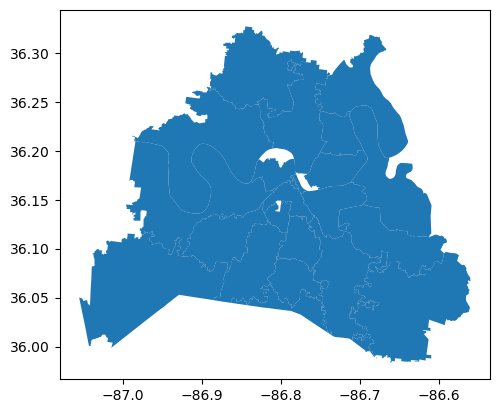

In [68]:
merged_df_fine_per_zip.plot()

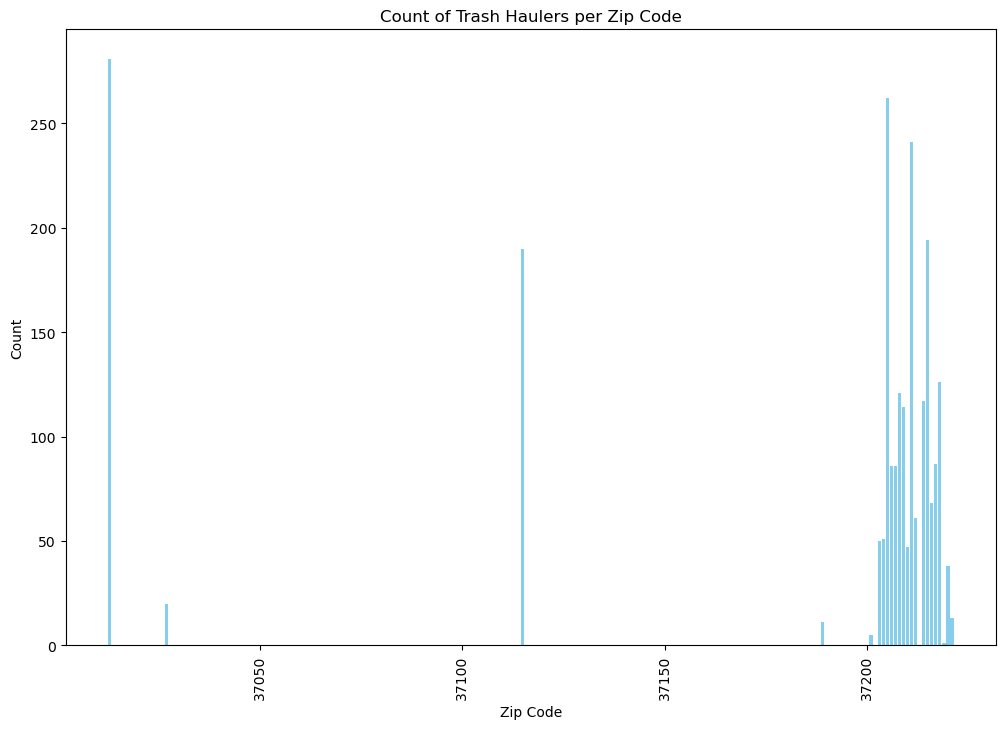

In [69]:
zip_codes = trash_hauler_count['Zip Code']
trash_haulers = trash_hauler_count['Trash Hauler']
counts = trash_hauler_count['Count']


plt.figure(figsize=(12, 8))
plt.bar(zip_codes, counts, color='skyblue')


plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Count of Trash Haulers per Zip Code')
plt.xticks(rotation=90)


plt.show()

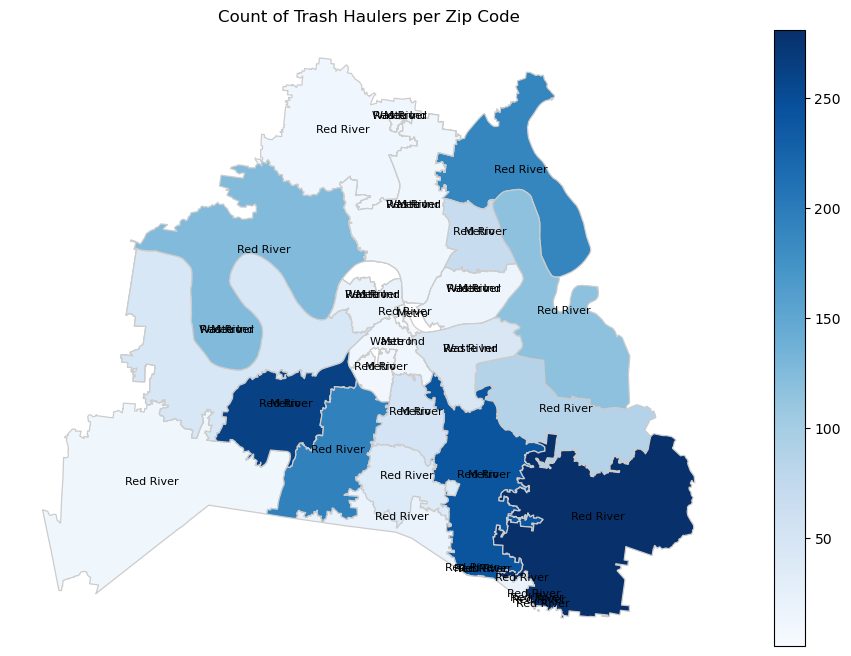

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
trash_hauler_count.plot(column='Count', cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.8', legend=True)

for idx, row in trash_hauler_count.iterrows():
   
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    plt.annotate(text=row['Trash Hauler'], xy=(x, y), xytext=(3, 3), textcoords='offset points', horizontalalignment='center', fontsize=8)
    
ax.axis('off') 
ax.set_title('Count of Trash Haulers per Zip Code')


plt.show()

AttributeError: 'numpy.float64' object has no attribute 'geometry'

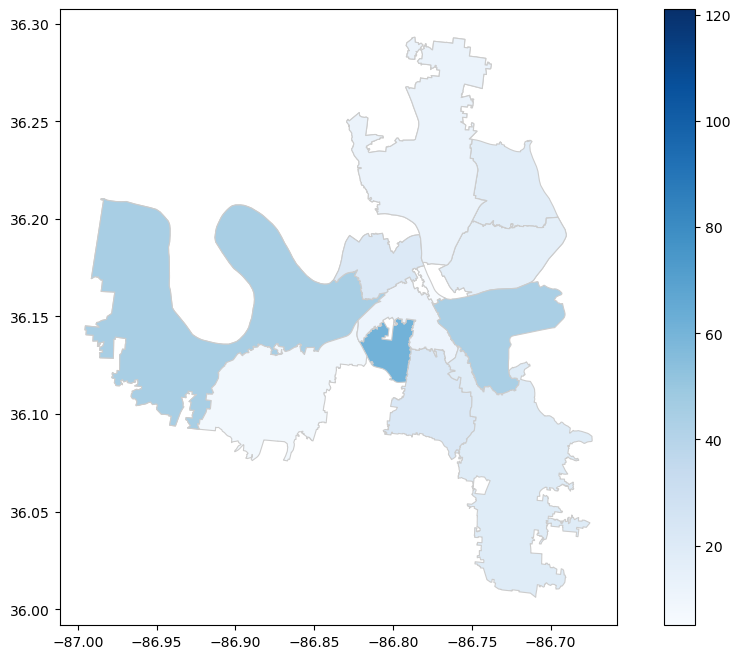

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
waste_ind_count_zip.plot(column='Count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in waste_ind_count_zip.iterrows():
   
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    plt.annotate(text=row['Trash Hauler'], xy=(x, y), xytext=(3, 3), textcoords='offset points', horizontalalignment='center', fontsize=8)
    
ax.axis('off') 
ax.set_title('Count of Waste Ind and Metro per Zip Code')

xy=x.geometry.centroid.coords[0]
plt.show()

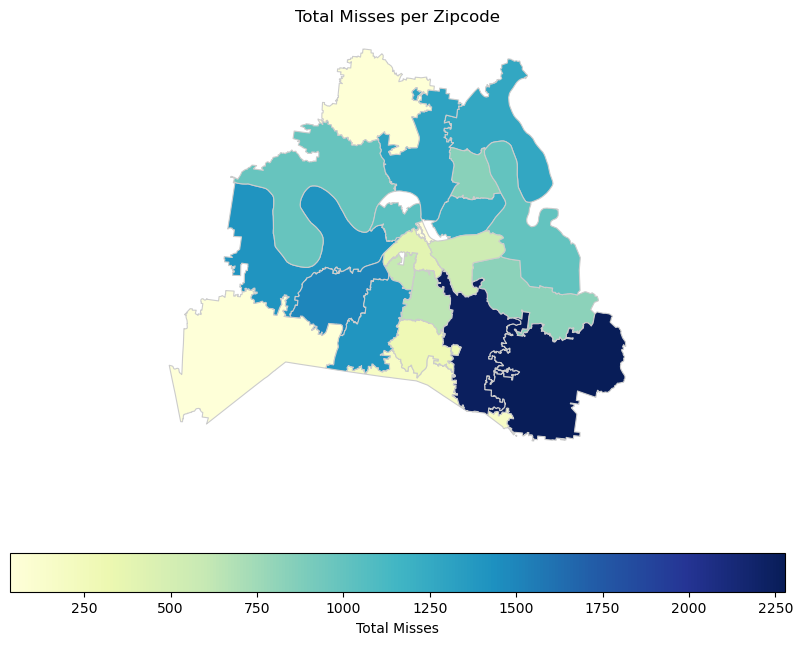

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_df_fine_per_zip.plot(column='Total Misses', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Total Misses", 'orientation': "horizontal",'format':"%.0f"})
ax.axis('off') 
ax.set_title('Total Misses per Zipcode')
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.get_xaxis().get_major_formatter().set_scientific(False)
#for idx, row in merged_df_fine_per_zip.iterrows():
     #plt.annotate(text=row['Zip Code'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center')

plt.show()

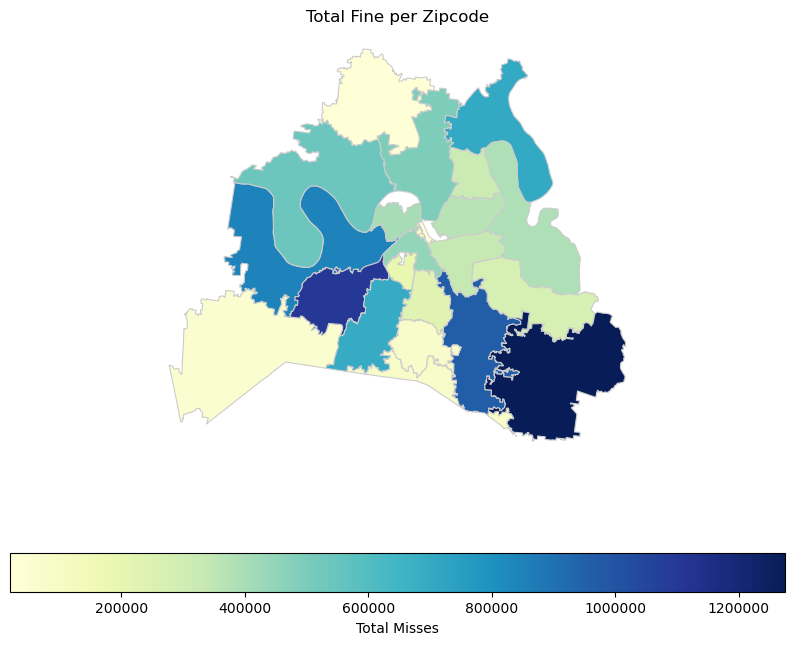

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_df_fine_per_zip.plot(column='fine_per_zipcode', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Total Misses", 'orientation': "horizontal",'format':"%.0f"})
ax.axis('off') 
ax.set_title('Total Fine per Zipcode')
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.get_xaxis().get_major_formatter().set_scientific(False)
#for idx, row in merged_df_fine_per_zip.iterrows():
     #plt.annotate(text=row['Zip Code'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center')

plt.show()

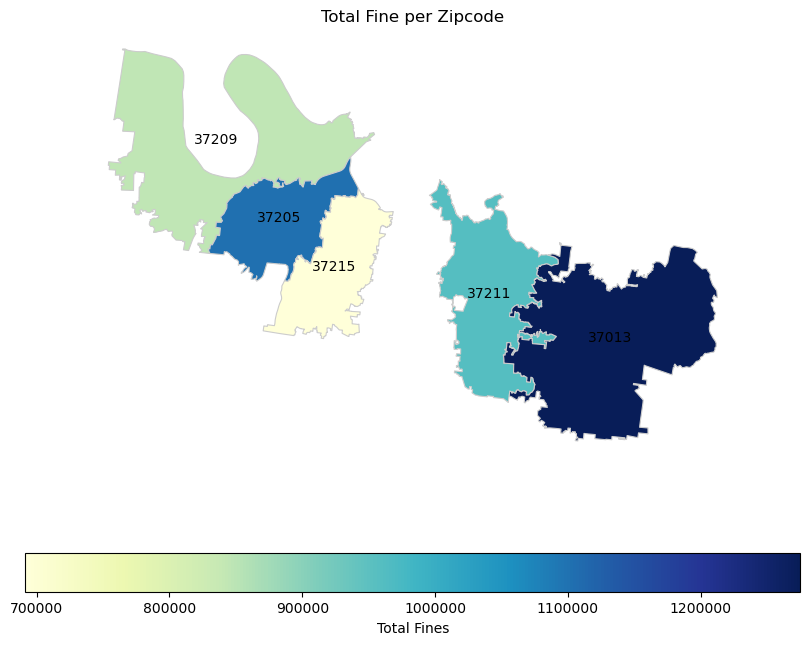

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
top_5_map.plot(column='fine_per_zipcode', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Total Fines", 'orientation': "horizontal",'format':"%.0f"})
ax.axis('off') 
ax.set_title('Total Fine per Zipcode')
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.get_xaxis().get_major_formatter().set_scientific(False)
for idx, row in top_5_map.iterrows():
     plt.annotate(text=row['Zip Code'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center')

plt.show()

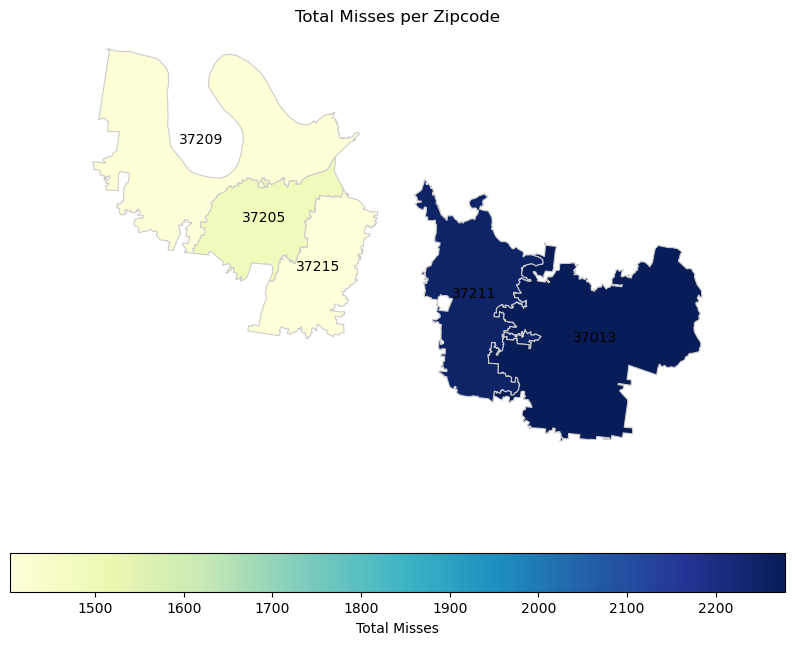

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
top_5_map.plot(column='Total Misses', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Total Misses", 'orientation': "horizontal",'format':"%.0f"})
ax.axis('off') 
ax.set_title('Total Misses per Zipcode')
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.get_xaxis().get_major_formatter().set_scientific(False)
for idx, row in top_5_map.iterrows():
     plt.annotate(text=row['Zip Code'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center')

plt.show()

In [76]:
#* The city is considering a different way to calculate fines by limiting the number of times a missed pickup can be counted towards a fine. 
#If each date can only be used once per fine how will this difference impact the fines levied? (Example: If Jan 1st, Mar 3rd, Apr 8th, Aug 9th 
#were the only 4 dates a trash pickup was missed the original method would result in $3000 in fines[Jan, Mar, Apr, and also Mar, Apr, Aug] however
#this updated method would only result in $1500 because neither Mar or Apr can be used for another fine because they were already used.)

In [77]:
one_date = total_misses.drop_duplicates(['Date Opened'])
one_date

Request Number Date Opened                       Request   \
0               25270  2017-11-01               Trash - Backdoor   
5227            25575  2017-11-02  Trash - Curbside/Alley Mis...   
5264            25988  2017-11-03  Trash - Curbside/Alley Mis...   
5271            26058  2017-11-05  Trash - Curbside/Alley Mis...   
42              26151  2017-11-06     Trash Collection Complaint   
...               ...         ...                            ...   
20109          264758  2019-10-28  Trash - Curbside/Alley Mis...   
20130          265529  2019-10-29  Trash - Curbside/Alley Mis...   
20138          265778  2019-10-30  Trash - Curbside/Alley Mis...   
20165          266308  2019-10-31  Trash - Curbside/Alley Mis...   
20203          266818  2019-11-01  Trash - Curbside/Alley Mis...   

                         Description        Incident Address  Zip Code  \
0      HOUSE WITH THE WHEEL CHAIR...       3817 Crouch Drive     37207   
5227                  MISSED PICK UP          346 Lynn Drive     37211   
5264   CUSTOMER HAD 2 TRASH CARTS...     3913 Tea Garden Way     37013   
5271   DID NOT SEE OR HEAR TRUCK ...       216 Gentry Avenue     37206   
42     BACKDOOR/TRASH KEEPS GETTI...            4625 Long Br     37013   
...                              ...                     ...       ...   
20109  TRASH/MISSED 3 WEEKS NOW, ...  2930 Murfreesboro Pike     37013   
20130  TRASH PICKUP MISSED FOR EN...      1805 25Th Avenue N     37208   
20138  CALLER STATED TRUCK DROVE ...     3415 Hydes Ferry Rd     37218   
20165  TRASH PICK UP MISSED UP AG...       777 W Meade Drive     37205   
20203  TRASH WAS NOT PICKED UP ON...     203 Mcmillin Street     37203   

      Trash Hauler Trash Route  Council District  State Plan X   State Plan Y  
0        Red River        3205                 2  1.727970e+06  686779.478089  
5227     Red River        4302                26  1.747944e+06  637187.797922  
5264     Red River        3504                33  1.787799e+06  631948.896411  
5271         Metro        9503                 6  1.752368e+06  674908.120529  
42       Red River        4505                28  1.770350e+06  634143.871818  
...            ...         ...               ...           ...            ...  
20109    Red River        4502                33  1.783307e+06  630464.520323  
20130        Metro        9205                21  1.727061e+06  673528.001864  
20138    Red River        4202                 2  1.720726e+06  677625.598358  
20165    Red River        1301                23  1.704560e+06  650286.401358  
20203        Metro        9208                21  1.734116e+06  664921.033269  

[686 rows x 11 columns]

In [78]:
one_datetm = one_date.groupby('Incident Address').rolling('182D', on = 'Date Opened').count('Request Number')

In [79]:
one_date_x = one_datetm['Request Number'] * 1500
one_date_x

Incident Address              
1001 W Grove Avenue      8674     1500.0
1002 N Graycroft Avenue  10875    1500.0
1004 Regents Park Cir    12777    1500.0
1006 Gilmore Avenue      7653     1500.0
1006 Southside Avenue    6019     1500.0
                                   ...  
940 Mansfield Street     8421     1500.0
95 Scobey Drive          1070     1500.0
950 Youngs Ln            13196    1500.0
954 Battery Ln           18924    1500.0
Benson Rd                15547    1500.0
Name: Request Number, Length: 686, dtype: float64

In [80]:
one_date_x.sum()

1047000.0